In [91]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import math
from scipy import stats
import seaborn as sns
import pickle
def cm2inch(*tupl):### plots in cm ##frontiers 180 mm for full width, 85 mm half width (1 column) figures
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
    
import warnings
warnings.filterwarnings("ignore")

fig_path= '/home/pelto/Desktop/ice_flux/figures/'
glacier = ['kokanee', 'conrad', 'illecillewaet']

In [92]:
# pal = sns.light_palette((210, 90, 60), input="husl", as_cmap=True)
# pal = sns.diverging_palette(10, 220, sep=80, n=50, as_cmap=True)
pal= sns.cubehelix_palette(light=1, as_cmap=True)

In [100]:
for i in range(3):
    with open(fig_path + glacier[i] +'_residuals.pkl', 'rb') as f:  #_NOfirn
        r = pickle.load(f)
    if i==0:
        ALL=r.copy()
    elif i>0:
        ALL=ALL.append(r,ignore_index=True,)
        
# ALL['opt_bd_fr']=ALL.opt_bdiff/np.abs(ALL.obs_bin_all)
# ALL['gpr_bd_fr']=ALL.gpr_bdiff/np.abs(ALL.obs_bin_all)
# ALL['far_bd_fr']=ALL.farin_bdiff/np.abs(ALL.obs_bin_all)
        
DATA=[];D2=[]
z=[]
# s= [ALL.opt_bdiff, ALL.farin_bdiff,ALL.gpr_bdiff]
s= [ALL.opt_bd_fg, ALL.farin_bd_fg,ALL.gpr_bd_fg]
s1=[ALL.opt_bd_fr, ALL.farin_bd_fr,ALL.gpr_bd_fr]
for i in range(3):
    DATA.extend(s[i])
    D2.extend(s1[i])
    z.extend(ALL.zrel)
    
DF = pd.DataFrame(list(zip(DATA,D2,z)),   columns=['all_data','all_frac','zrel'])
DF.dropna(subset=['all_data'],inplace=True)
# DF.all_frac[np.abs(DF.all_frac)>4]=np.nan;DF.dropna(subset=['all_frac'],inplace=True)
print(len(DF))
# DF.all_data[np.abs(DF.all_frac)>1.0]=np.nan;DF.dropna(subset=['all_data'],inplace=True)
print(len(DF))

195
195


In [106]:
np.mean(DF.all_data[DF.zrel>0.7])

0.10023779936968626

In [110]:
np.mean(DF.all_data[DF.zrel<0.5])

-0.0718833845359924

In [98]:
DF.all_frac[np.abs(DF.all_frac)>2.0]=np.nan
DF.dropna(subset=['all_frac'],inplace=True)
len(DF)

11

In [95]:
1-(121/195)


0.37948717948717947

In [96]:
glacier

['kokanee', 'conrad', 'illecillewaet']

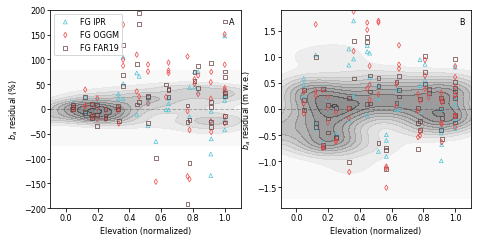

In [97]:
font = {'family' : 'Helvetica', 'weight' : 'normal',  'size'   : 8}
mfc='none'; mew=1.25; elw=0.5
plt.rc('font', **font)
pylab.rcParams['xtick.major.pad']='1.';pylab.rcParams['ytick.major.pad']='1.'


s=15; a=1; lw=0.7;
fig, ax = plt.subplots(1,2, figsize=(cm2inch(16.5, 8))) ##mass conservation plot

DF.all_frac=DF.all_frac*100;
# cb_ax = fig.add_axes([0.1, 0.8, 0.88, 0.02])
# cbar_kws={'label':'Kernel density'} ## ,'ticks_position':'right' rotation':'90',, ticks=np.arange(0,90,20),

kde1=sns.kdeplot(DF.zrel, DF.all_frac, cmap='gray_r', shade=True, cbar=False, cbar_ax=cb_ax, cbar_kws=cbar_kws, shade_lowest=True,ax=ax[0],alpha=0.5,zorder=0)
kde2= sns.kdeplot(DF.zrel, DF.all_data, cmap='gray_r', cbar=False,cbar_kws=cbar_kws, shade=True, shade_lowest=True,ax=ax[1],alpha=0.5,zorder=0)


# c=['k', '#e08214','#542788']  ## black, orange, purple
c = ['k', '#51c2d5','#663f3f','#ec4646']
sym = ['o', '^', 's', 'd']
for i in range(3):
    with open(fig_path + glacier[i] +'_residuals.pkl', 'rb') as f: #_NOfirn
        R = pickle.load(f)
        if i ==0:
            r = R.copy()
        else:
            r =  pd.concat([r, R], axis=0)
r.gpr_bd_fr=r.gpr_bd_fr*100;r.farin_bd_fr=r.farin_bd_fr*100;r.opt_bd_fr=r.opt_bd_fr*100

#     r['gpr_fr']=r.gpr_bdiff/np.abs(r.obs_bin_all);r['far_fr']=r.farin_bdiff/np.abs(r.obs_bin_all);
#     r['opt_fr']=r.opt_bdiff/np.abs(r.obs_bin_all);  
    
# r.gpr_bd_fr[np.abs(r.gpr_bd_fr)>200]=np.nan; r.farin_bd_fr[np.abs(r.farin_bd_fr)>200]=np.nan;
# r.opt_bd_fr[np.abs(r.opt_bd_fr)>200]=np.nan; 
#     r.gpr_bd_fg[np.abs(r.gpr_bd_fg)>2]=np.nan; r.farin_bd_fg[np.abs(r.farin_bd_fg)>2]=np.nan; 
#     r.opt_bd_fg[np.abs(r.opt_bd_fg)>2]=np.nan; 
    
ax[0].axhline(linewidth=1, color='k', ls='--', alpha=0.25, zorder=1)
ax[0].set(ylabel=('$b_a$ residual ($\%$)'),xlabel=('Elevation (normalized)'),xlim=(-0.1,1.1))#,ylim=(-2,4))
ax[0].scatter(r.zrel, r.gpr_bd_fr , label= 'FG IPR',color=c[1],marker=sym[1],s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
ax[0].scatter(r.zrel, r.opt_bd_fr, label ='FG OGGM' ,color=c[3],marker=sym[3],s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
ax[0].scatter(r.zrel, r.farin_bd_fr, label= 'FG FAR19', color=c[2],marker=sym[2],s=s, facecolors='none', lw=lw, zorder=2,alpha=a)



# cbar = fig.colorbar(kde1, cax=cb_ax)
# cbar.set_ticks(np.arange(0, 1.0, 0.1))


ax[1].axhline(linewidth=1, color='k', ls='--', alpha=0.25, zorder=1)
ax[1].set(ylabel=('$b_a$ residual (m w.e.)'),xlabel=('Elevation (normalized)'),xlim=(-0.1,1.1),ylim=(-1.9,1.9))
ax[1].scatter(r.zrel, r.gpr_bd_fg,color=c[1],marker=sym[1],s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
ax[1].scatter(r.zrel, r.farin_bd_fg, color=c[2],marker=sym[2],s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
ax[1].scatter(r.zrel, r.opt_bd_fg,color=c[3],marker=sym[3],s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
ax[0].set_ylim(-200,200)
ax[0].text(0.94, 0.93, 'A', transform=ax[0].transAxes);ax[1].text(0.94, 0.93, 'B', transform=ax[1].transAxes);
ax[0].legend()
# plt.tight_layout()
fig.subplots_adjust(bottom=0.105, top=0.98, hspace=0.1, left=0.09, right=0.99, wspace=0.21)
plt.savefig(fig_path + 'MB_residuals_new2.pdf',dpi=300) #_NOfirn

In [ ]:
# s=40; a=1; lw=1.0;
# fig, ax = plt.subplots(1,2, figsize=(cm2inch(36, 18))) ##mass conservation plot

# sns.kdeplot(DF.zrel, DF.all_frac, cmap='Blues', shade=True, cbar=False, shade_lowest=True,ax=ax[0],alpha=a,zorder=0)
# sns.kdeplot(DF.zrel, DF.all_data, cmap='Blues', shade=True, shade_lowest=True,ax=ax[1],alpha=a,zorder=0)

# c=['k', '#e08214','#542788']

# for i in range(3):
#     with open(fig_path + glacier[i] +'_residuals.pkl', 'rb') as f:
#         r = pickle.load(f)
        
#     r['gpr_fr']=r.gpr_bdiff/np.abs(r.obs_bin_all);r['far_fr']=r.farin_bdiff/np.abs(r.obs_bin_all);
#     r['opt_fr']=r.opt_bdiff/np.abs(r.obs_bin_all);  
    
#     r.gpr_fr[np.abs(r.gpr_fr)>5]=np.nan; r.far_fr[np.abs(r.far_fr)>5]=np.nan; r.opt_fr[np.abs(r.opt_fr)>5]=np.nan 
    
#     ax[0].axhline(linewidth=1, color='k', ls='--', alpha=0.25, zorder=1)
#     ax[0].set(ylabel=('MB residual (fractional)'),xlabel=('Elevation (normalized)'),xlim=(-0.1,1.1),ylim=(-2,4))
#     ax[0].scatter(r.zrel, r.gpr_fr ,color=c[i],marker='^',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
#     ax[0].scatter(r.zrel, r.far_fr, color=c[i],marker='d',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
#     ax[0].scatter(r.zrel, r.opt_fr, color=c[i],marker='s',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
    
#     ax[1].axhline(linewidth=1, color='k', ls='--', alpha=0.25, zorder=1)
#     ax[1].set(ylabel=('MB residual (m w.e.)'),xlabel=('Elevation (normalized)'),ylim=(-2,2.7),xlim=(-0.1,1.1))
#     ax[1].scatter(r.zrel, r.gpr_bdiff,color=c[i],marker='^',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
#     ax[1].scatter(r.zrel, r.farin_bdiff, color=c[i],marker='d',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
#     ax[1].scatter(r.zrel, r.opt_bdiff,color=c[i],marker='s',s=s, facecolors='none', lw=lw, zorder=2,alpha=a)
# # ax[1].legend()
# plt.tight_layout()
# plt.savefig(fig_path + 'MB_residuals2.pdf',dpi=300)

In [ ]:
DF

In [ ]:
f=sns.palplot(sns.light_palette((210, 90, 60), input="husl", as_cmap=True))

In [ ]:
g = sns.jointplot(x="zrel", y="all_data", data=DF, kind="kde", color=f)
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
plt.ylim(-2,2.2)
g.set_axis_labels("$X$", "$Y$");

In [ ]:
# DF = pd.DataFrame(list(zip(ALL.opt_bdiff,ALL.zrel), 
#                   columns=['opt_bdiff','zrel']) 
g = sns.jointplot(x="zrel", y="all_frac", data=DF, kind="kde", color='b')
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
plt.ylim(-2,2.2)
g.set_axis_labels("$X$", "$Y$");